###특성공학과 규제



### 다중회귀(Mutiple Regression = Multinomial Regression)

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://bit.ly/perch_csv_data') ## 첫행을 자동으로 각열의 이름으로 처리 , 두번째 행부터 실제 데이터로 처리
perch_full = df.to_numpy() ## column_stack 함수로 만든 넘파이 배열과 동일한 객체가 만들어짐
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

  - 넘파이 튜토리얼 : http://ml-ko.kr/homl2/tools_numpy.html
  - 판다스 튜토리얼 : http://ml-ko.kr/homl2/tools_pandas.html


### 다항특성 만들기


In [66]:
from sklearn.preprocessing import PolynomialFeatures  ## PolynomialFeatures를 변환기(transformer) , LinearRegression, KNeighborsRegressor 들을 추정기(estimator)라고 지칭한다.

# degree = 2  ## 제곱값을 만드는 변수
poly = PolynomialFeatures()
poly.fit([[2, 3]])
# 1(bias), 2, 3, 2**2, 2*3, 3**2
print(poly.transform([[2, 3]]))

[[1. 2. 3. 4. 6. 9.]]


 - 1이 존재하는 이유는 절편에 대한 가상의 특성을 1이라고 가정하고 추가한다.
 - y = a*x + b*1 이라는 다항 함수를 에 대한 수식은 다음과 같이 표시 할 수 있다. [a, b] * [x, 1]

   - PolynomialFeatures를 변환기(transformer) , LinearRegression, KNeighborsRegressor 들을 추정기(estimator)라고 지칭한다.
   - estimator(추정기) 들은 fit -> predict -> score 와 같은 함수가 존재한다.
   - transformer(변환기) 들은 fit -> transform 와 같은 함수들이 존재한다.
   - 절차를 간소화 하기위해 fit_transform() 함수가 존재한다

## LinearRegression

In [67]:
import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [68]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

   - perch_full 데이터는 길이 높이 두께의 3개의 데이터 세트이다.
   - perch_weight 데이터는 농어의 무게에 대한 데이터이다.

   - 여기서는 perch_full 데이터(길이, 높이, 두께)의 데이터로 perch_weight 데이터를 예측해보는 알고리즘을 구현하려고 한다.

In [69]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)

print(train_poly.shape)

(42, 9)


In [70]:
print(poly.get_feature_names_out())
test_poly = poly.transform(test_input)

['x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']


  - prech_full 데이터를 PolynomialFeatures 변환기를 이용하여 다항식으로 변환해준다.
  - 위의 데이터는 다항식으로 변환된 변수들의 수식이다.
  - 3개의 변수가 9개의 변수로 늘어난 것을 볼수 있다.
  - poynomial 변환기의 기본값(default 값)이 dgree = 2 이기 때문에 제곱값 까지만 나온것을 알 수 있다.

  - train_input 데이터는 fit 함수를 거쳐서 transform을 해야지 올바른 방식이다.
  - test_input 데이터는 fit 을 거칠 필요가 없고 transform 만 해도 된다.

In [71]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(train_poly, train_target)

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9903183436982125
0.9714559911594111


## 더 많은 특성 만들기

In [72]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
print(train_poly.shape)

(42, 55)


In [73]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9999999999996433
-144.40579436844948


  - PolynomialFeatures의 degree를 5로 늘려서 변수의 갯수를 55개까지 늘려보았다.
  - 훈련세트의 정확도는 올라갔지만, 반대로 테스트 세트의 정확도는 -144.405 가 나오는 것을 알 수 있다. 이는 과대적합문제가 발생하였다.
  - 이는 맞춰야 될 개수 42개 보다 투입된 변수가 55개로 더 많아서 발생한 문제이므로 변수의 개수가 일대일 대응보다 더 많아서 발생하였다.(과대적합)

  - 규제(regularization) 혹은 정규화라고 불리는 작업이 필요하다.
  - 규제는 위와 같이 위와 같이 극도로 과대적합된 모델을 완화하는데 쓰이는 대표적인 기법이다.
  - 선형회귀라면 어떠한 모델의 가중치(기울기)값들을 줄여서 일반화된 모델을 만드는 과정을 의미한다. (릿지 회귀, 라소 회귀 )

## 규제 전에 표준화

In [74]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)

train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

## 릿지 회귀

In [75]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9896101671037343
0.9790693977615387


  - Ridge() 회귀는 (가중치)^2을 규제하므로 L2 규제라고도 불린다
  - Ridge() 함수에는 매개변수 alpha 가 존재하며 default 값은 1이다. 이 알파 매개변수를 크게 하면 강도가 세진다, 알파 매개변수의 값을 작게하면 강도가 작아진다.
  - 제약 조건에서 (가중치)^2 의 가중치 변수는 모델에서 학습해서 찾아주는 값으로 모델 파라미터라고 한다.
  - alpha 값이 최적인지는 사전에 알수 없으며, alpha 값을 바꿔 가면서 최적의 값을 찾는 것이 기본이다.
  - alpha 값은 사용자가 정하는 값으로 대표적인 하이퍼 파라미터 값이다.

## 적절한 규제 강도 찾기


0.001 0.9930455252088248
0.001 0.9569388961567329
0.01 0.991780998125052
0.01 0.9800187936871725
0.1 0.9903815817570367
0.1 0.9827976465386928
1 0.9896101671037343
1 0.9790693977615387
10 0.988728468997471
10 0.9725329582461569
100 0.9841843235774494
100 0.9627042641050291


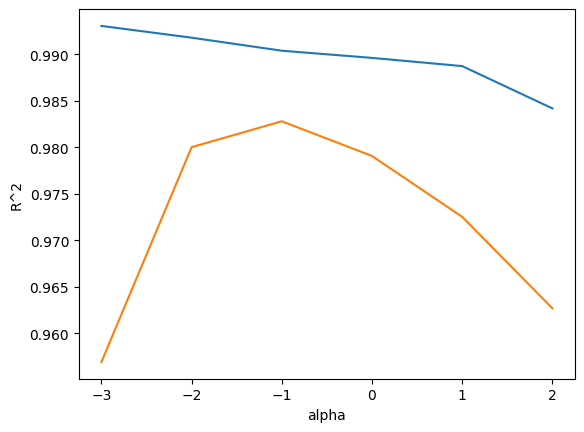

In [76]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]  ## 하이퍼 파라미터를 찾을 때 사용하는 일반적인 방법 (10의 배수를 활용한다. 상용 log scale)
train_score = []
test_score = []
for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled, train_target)
    print(alpha, ridge.score(train_scaled, train_target))
    print(alpha, ridge.score(test_scaled, test_target))
    train_score.append(ridge.score(train_scaled, train_target))
    test_score.append(ridge.score(test_scaled, test_target))

plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.show()

In [77]:
print(train_score)
print(test_score)

[0.9930455252088248, 0.991780998125052, 0.9903815817570367, 0.9896101671037343, 0.988728468997471, 0.9841843235774494]
[0.9569388961567329, 0.9800187936871725, 0.9827976465386928, 0.9790693977615387, 0.9725329582461569, 0.9627042641050291]


In [78]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))

0.9903815817570367
0.9827976465386928


## 라쏘 회귀

  - 릿지회귀는 가중치의 제곱값을 벌칙으로 주는 반면에 라쏘회귀는 가중치의 절대값을 벌칙으로 주어진다.
  - 라쏘회귀는 L1 규제를 적용한다고 말한다. 즉 L1 규제가 선형회귀에 주어진 것이 라쏘회귀이다.

In [79]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.989789897208096
0.9800593698421883


In [80]:
# # 라쏘회귀 시각화
# import matplotlib.pyplot as plt

# # 학습 데이터와 테스트 데이터에 대한 예측 값 계산
# train_predictions = lasso.predict(train_scaled)
# test_predictions = lasso.predict(test_scaled)

# # 학습 데이터에 대한 실제 값과 예측 값을 비교하는 그래프
# plt.figure(figsize=(14, 6))

# plt.subplot(1, 2, 1)
# plt.scatter(train_target, train_predictions, alpha=0.5)
# plt.plot([train_target.min(), train_target.max()], [train_target.min(), train_target.max()], 'r--')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Train Data: Actual vs Predicted')

# # 테스트 데이터에 대한 실제 값과 예측 값을 비교하는 그래프
# plt.subplot(1, 2, 2)
# plt.scatter(test_target, test_predictions, alpha=0.5)
# plt.plot([test_target.min(), test_target.max()], [test_target.min(), test_target.max()], 'r--')
# plt.xlabel('Actual')
# plt.ylabel('Predicted')
# plt.title('Test Data: Actual vs Predicted')

# plt.tight_layout()
# plt.show()


In [81]:
lasso = Lasso(alpha=10)
lasso.fit(train_scaled, train_target)

print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

print(np.sum(lasso.coef_ == 0))

0.9888067471131867
0.9824470598706695
40


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.025e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.947e+04, tolerance: 5.183e+02
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.879e+04, tolerance: 5.183e

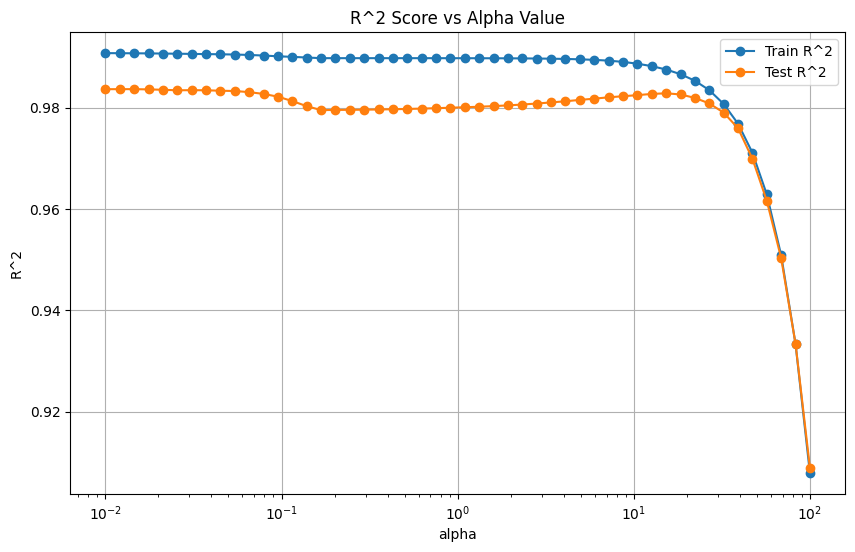

In [82]:
# alpha 값의 범위 설정
alpha_values = np.logspace(-2, 2, 50)
train_scores = []
test_scores = []

# 다양한 alpha 값에 대한 모델 학습 및 평가
for alpha in alpha_values:
    lasso = Lasso(alpha=alpha)
    lasso.fit(train_scaled, train_target)
    train_scores.append(lasso.score(train_scaled, train_target))
    test_scores.append(lasso.score(test_scaled, test_target))

# 그래프 그리기
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, train_scores, label='Train R^2', marker='o')
plt.plot(alpha_values, test_scores, label='Test R^2', marker='o')
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.title('R^2 Score vs Alpha Value')
plt.legend()
plt.grid(True)
plt.show()